In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
data = pd.read_csv('EUROPEAN_CHAMP.csv', encoding= 'cp949')

In [3]:
data.head()

,pid,gender,rank,rank_s,rank_cj,name,born,nation,category,bweight,...,snatch2,snatch3,snatch,jerk1,jerk2,jerk3,jerk,total,event,date
0,0,M,1,3,1,RUSEV Angel Hriskov,13.07.2001,BUL,55,54.88,...,105,111,111,140,*147,147,147,258,EUROPEAN CHAMPIONSHIPS,4.2021
1,1,M,2,5,2,IANCU Valentin-lonadi,16.01.2000,ROU,55,54.98,...,105,108,108,130,135,140,140,248,EUROPEAN CHAMPIONSHIPS,4.2021
2,2,M,3,4,3,VORONOVSKYI Dmytro,04.01.1997,UKR,55,54.96,...,110,*112,110,133,137,*140,137,247,EUROPEAN CHAMPIONSHIPS,4.2021
3,3,M,4,2,5,SAHIN Muammer,05.02.1994,TUR,55,54.88,...,109,112,112,*130,*130,130,130,242,EUROPEAN CHAMPIONSHIPS,4.2021
4,4,M,5,1,8,LUNGU Daniel,16.10.1998,MDA,55,54.94,...,*111,113,113,*127,127,*131,127,240,EUROPEAN CHAMPIONSHIPS,4.2021


In [4]:
data.columns

Index(['pid', 'gender', 'rank', 'rank_s', 'rank_cj', 'name', 'born', 'nation',
       'category', 'bweight', 'snatch1', 'snatch2', 'snatch3', 'snatch',
       'jerk1', 'jerk2', 'jerk3', 'jerk', 'total', 'event', 'date'],
      dtype='object')

In [5]:
pure_data = data.drop(['pid','name', 'born','nation', 'category','snatch1', 'snatch2', 'snatch3', 'snatch',
       'jerk1', 'jerk2', 'jerk3', 'jerk','event', 'date'], axis = 1) 

In [6]:
pure_data.head(25)

,gender,rank,rank_s,rank_cj,bweight,total
0,M,1,3,1,54.88,258
1,M,2,5,2,54.98,248
2,M,3,4,3,54.96,247
3,M,4,2,5,54.88,242
4,M,5,1,8,54.94,240
5,M,6,6,4,54.74,237
6,M,7,7,9,54.96,229
7,M,8,8,7,55.00,225
8,M,9,9,6,54.94,224
9,M,1,1,2,60.82,296


In [7]:
pure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gender   311 non-null    object 
 1   rank     311 non-null    object 
 2   rank_s   311 non-null    object 
 3   rank_cj  310 non-null    object 
 4   bweight  311 non-null    float64
 5   total    311 non-null    object 
dtypes: float64(1), object(5)
memory usage: 14.7+ KB


In [8]:
ind_1 = pure_data[pure_data['total']=='___'].index
print(ind_1)

Int64Index([ 22,  35,  52,  53,  69,  70,  71,  72,  88,  89, 103, 104, 133,
            152, 153, 162, 193, 194, 195, 196, 214, 215, 259],
           dtype='int64')


In [9]:
real_data = pure_data.drop(ind_1)

In [10]:
real_data['total'].head()

0    258
1    248
2    247
3    242
4    240
Name: total, dtype: object

In [11]:
real_data['new_total'] = real_data['total'].astype('int')
real_data

,gender,rank,rank_s,rank_cj,bweight,total,new_total
0,M,1,3,1,54.88,258,258
1,M,2,5,2,54.98,248,248
2,M,3,4,3,54.96,247,247
3,M,4,2,5,54.88,242,242
4,M,5,1,8,54.94,240,240
...,...,...,...,...,...,...,...
306,W,8,9,7,88.84,204,204
307,W,9,8,8,92.78,203,203
308,W,10,10,10,88.12,196,196
309,W,11,12,11,97.68,187,187


In [12]:
from sklearn.preprocessing import LabelEncoder

items = real_data['gender']
encoder = LabelEncoder()

encoder.fit(items)
labels = encoder.transform(items)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
#num_gender열은 남자면 0 여자면 1을 할당함
real_data['num_gender'] = labels
real_data.head(25)

,gender,rank,rank_s,rank_cj,bweight,total,new_total,num_gender
0,M,1,3,1,54.88,258,258,0
1,M,2,5,2,54.98,248,248,0
2,M,3,4,3,54.96,247,247,0
3,M,4,2,5,54.88,242,242,0
4,M,5,1,8,54.94,240,240,0
5,M,6,6,4,54.74,237,237,0
6,M,7,7,9,54.96,229,229,0
7,M,8,8,7,55.00,225,225,0
8,M,9,9,6,54.94,224,224,0
9,M,1,1,2,60.82,296,296,0


In [14]:
# real_data['Rank'] = real_data['rank'].astype(int)
# real_data['Rank_s'] = real_data['rank_s'].astype(int)
# real_data['Rank_cj'] = real_data['rank_cj'].astype(int)

real_data.isna().sum()

gender        0
rank          0
rank_s        0
rank_cj       1
bweight       0
total         0
new_total     0
num_gender    0
dtype: int64

In [15]:
datas = real_data.dropna()

In [16]:
datas['Rank'] = datas['rank'].astype(int)
datas['Rank_s'] = datas['rank_s'].astype(int)
datas['Rank_cj'] = datas['rank_cj'].astype(int)

C:\Users\wndbs\AppData\Local\Temp/ipykernel_23192/209432868.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas['Rank'] = datas['rank'].astype(int)
C:\Users\wndbs\AppData\Local\Temp/ipykernel_23192/209432868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas['Rank_s'] = datas['rank_s'].astype(int)
C:\Users\wndbs\AppData\Local\Temp/ipykernel_23192/209432868.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [17]:
datas

,gender,rank,rank_s,rank_cj,bweight,total,new_total,num_gender,Rank,Rank_s,Rank_cj
0,M,1,3,1,54.88,258,258,0,1,3,1
1,M,2,5,2,54.98,248,248,0,2,5,2
2,M,3,4,3,54.96,247,247,0,3,4,3
3,M,4,2,5,54.88,242,242,0,4,2,5
4,M,5,1,8,54.94,240,240,0,5,1,8
...,...,...,...,...,...,...,...,...,...,...,...
306,W,8,9,7,88.84,204,204,1,8,9,7
307,W,9,8,8,92.78,203,203,1,9,8,8
308,W,10,10,10,88.12,196,196,1,10,10,10
309,W,11,12,11,97.68,187,187,1,11,12,11


In [18]:
datas.columns

Index(['gender', 'rank', 'rank_s', 'rank_cj', 'bweight', 'total', 'new_total',
       'num_gender', 'Rank', 'Rank_s', 'Rank_cj'],
      dtype='object')

In [19]:
data = datas.drop(['rank', 'rank_s', 'rank_cj','total' ] ,axis = 1)
data

,gender,bweight,new_total,num_gender,Rank,Rank_s,Rank_cj
0,M,54.88,258,0,1,3,1
1,M,54.98,248,0,2,5,2
2,M,54.96,247,0,3,4,3
3,M,54.88,242,0,4,2,5
4,M,54.94,240,0,5,1,8
...,...,...,...,...,...,...,...
306,W,88.84,204,1,8,9,7
307,W,92.78,203,1,9,8,8
308,W,88.12,196,1,10,10,10
309,W,97.68,187,1,11,12,11


In [20]:
data =  data[['gender','num_gender', 'bweight', 'Rank_s','Rank_cj', 'Rank','new_total']]
data

,gender,num_gender,bweight,Rank_s,Rank_cj,Rank,new_total
0,M,0,54.88,3,1,1,258
1,M,0,54.98,5,2,2,248
2,M,0,54.96,4,3,3,247
3,M,0,54.88,2,5,4,242
4,M,0,54.94,1,8,5,240
...,...,...,...,...,...,...,...
306,W,1,88.84,9,7,8,204
307,W,1,92.78,8,8,9,203
308,W,1,88.12,10,10,10,196
309,W,1,97.68,12,11,11,187


In [21]:
corr = data.corr()
corr

,num_gender,bweight,Rank_s,Rank_cj,Rank,new_total
num_gender,1.000000,-0.458813,0.078382,0.098926,0.093429,-0.862154
bweight,-0.458813,1.000000,-0.002762,-0.024519,-0.008303,0.754513
Rank_s,0.078382,-0.002762,1.000000,0.800013,0.926264,-0.225489
Rank_cj,0.098926,-0.024519,0.800013,1.000000,0.940453,-0.252022
Rank,0.093429,-0.008303,0.926264,0.940453,1.000000,-0.251255
new_total,-0.862154,0.754513,-0.225489,-0.252022,-0.251255,1.000000


<AxesSubplot:>

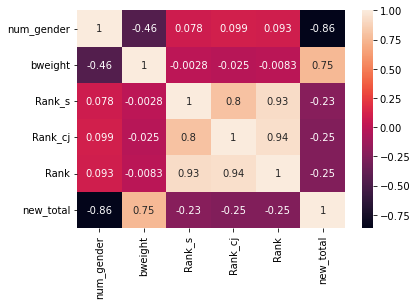

In [22]:
sns.heatmap(corr, annot=True)

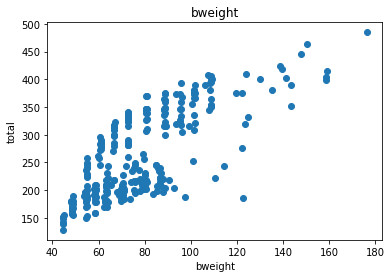

In [23]:
plt.scatter(data['bweight'], data['new_total'] )
plt.xlabel('bweight')
plt.ylabel('total')
plt.title('bweight')
plt.show()

<AxesSubplot:xlabel='bweight', ylabel='new_total'>

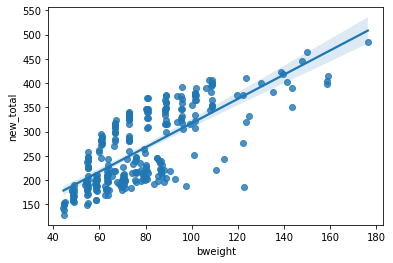

In [25]:
sns.regplot(x = data['bweight'], y=data['new_total'])

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [34]:
x= data[['bweight']]
y= data[['new_total']]

In [35]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [36]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: [67.20743205]
회귀 계수값: [[2.5]]
